# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/2322/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2
5,1432.0,visualize data with the matplotlib library,b32cd4e1a74e55ac42e4ef484b1f0ad41ee3b1c5
6,1429.0,use deep learning for image classification,3c2de1b0a92728aa53064a22ff7bd7319878ed95
7,593.0,upload files to ibm data science experience us...,3bbca9c41c66c4ecc46bc14eac7b7ab1ab0a5bea
8,1314.0,healthcare python streaming application demo,8b6fb4bbb7a27b336ba35420bf58337d877455c7
9,1185.0,classify tumors with machine learning,35d5799b6ea3ba24f921ed38f7f9a8039ad06ba4


In [2]:
# Show df_content to get an idea of the data
df_content

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4
5,Compose is all about immediacy. You want a new...,Using Compose's PostgreSQL data browser.,Browsing PostgreSQL Data with Compose,Live,5
6,UPGRADING YOUR POSTGRESQL TO 9.5Share on Twitt...,Upgrading your PostgreSQL deployment to versio...,Upgrading your PostgreSQL to 9.5,Live,6
7,Follow Sign in / Sign up 135 8 * Share\r\n * 1...,For a company like Slack that strives to be as...,Data Wrangling at Slack,Live,7
8,* Host\r\n * Competitions\r\n * Datasets\r\n *...,Kaggle is your home for data science. Learn ne...,Data Science Bowl 2017,Live,8
9,THE GRADIENT FLOW\r\nDATA / TECHNOLOGY / CULTU...,[A version of this post appears on the O’Reill...,Using Apache Spark to predict attack vectors a...,Live,9


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [3]:
# Number of articles
num_articles = df['article_id'].nunique()
print('Number of unique articles read by users:', num_articles)

# Number of readers
num_readers = df['email'].nunique()
print('Number of readers:', num_readers)

Number of unique articles read by users: 714
Number of readers: 5148


''

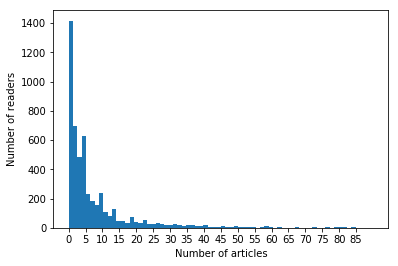

In [4]:
# What is the distribution of how many articles a user interacts with in the dataset?
df_grouping_user = df.groupby(['email']).count()['title']
ax = df_grouping_user.plot.hist(align='mid',bins=70, range=[0,90])
ax.set_xticks(np.arange(0, 90, 5), minor=False)
plt.xlabel('Number of articles')
plt.ylabel('Number of readers')
;

On the abscissa axis of the histograms we have the number of artciles and on the ordinate axis the number of readers. This shows that the majority of readers have only read a few articles. For a more granular (per user) depiction of how many and which artciles each user reads, we povide you with the following table:

In [5]:
#  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user 
# interacts with an article. 

# This table shows how many times each user has interacted with an article
df.groupby(['email', 'article_id']).count()

title
email                                    article_id       
0000b6387a0366322d7fbfc6434af145adf7fed1 43.0            2
                                         124.0           1
                                         173.0           1
                                         288.0           1
                                         349.0           1
                                         618.0           1
                                         732.0           1
                                         1162.0          1
                                         1232.0          1
                                         1314.0          1
                                         1337.0          1
                                         1354.0          1
001055fc0bb67f71e8fa17002342b256a30254cd 124.0           1
                                         254.0           1
                                         390.0           1
                                         1386.0          1
00148e4911c7e04eeff8def7bbbdaf1c59c2c621 258.0           1
                                         932.0           1
                                         1386.0          1
001a852ecbd6cc12ab77a785efa137b2646505fe 232.0           1
                                         349.0           1
                                         593.0           1
                                         957.0           1
                                         1364.0          2
001fc95b90da5c3cb12c501d201a915e4f093290 379.0           1
                                         1364.0          1
0042719415c4fca7d30bd2d4e9d17c5fc570de13 20.0            1
                                         1060.0          1
00772abe2d0b269b2336fc27f0f4d7cb1d2b65d7 732.0           1
                                         1427.0          2
...                                                    ...
ffe3d0543c9046d35c2ee3724ea9d774dff98a32 617.0           1
                                         701.0           1
                                         727.0           1
                                         782.0           1
                                         784.0           1
                                         878.0           1
                                         943.0           1
                                         986.0           1
                                         1047.0          1
                                         1162.0          1
                                         1165.0          1
                                         1314.0          2
                                         1360.0          2
                                         1386.0          1
                                         1422.0          3
                                         1425.0          1
                                         1427.0          1
fff9fc3ec67bd18ed57a34ed1e67410942c4cd81 116.0           1
                                         232.0           1
                                         268.0           2
                                         525.0           1
                                         684.0           3
                                         962.0           1
                                         1431.0          1
fffb93a166547448a0ff0232558118d59395fecd 329.0           1
                                         981.0           1
                                         1304.0          1
                                         1305.0          8
                                         1430.0          1
                                         1437.0          1

[33669 rows x 1 columns]

A histogram for each user would be too resource intensive, the above table summarizes the such information. We encourage the reader to take this dataframe and explore some of the users. 

In [6]:
# Fill in the median and maximum number of user_article interactios below
median_val = df_grouping_user.median() # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user = df_grouping_user.max() # The maximum number of user-article interactions by any 1 user is ______.
email_of_assiduous_reader = df.groupby(['email']).count()['title']\
[df.groupby(['email']).count()['title']==max_views_by_user].index[0]

print('50% of individuals interact with {} number of articles or fewer.'.format(median_val))
print('The maximum number of user-article interactions by any 1 user is {}.'.format(max_views_by_user))
print('The hash of the most assiduous reader\'s email is:', email_of_assiduous_reader)

50% of individuals interact with 3.0 number of articles or fewer.
The maximum number of user-article interactions by any 1 user is 364.
The hash of the most assiduous reader's email is: 2b6c0f514c2f2b04ad3c4583407dccd0810469ee


We see from the histogram that the dataset is very positively skewed, let us check the average and the std. The average must be larger than the median, the larger the difference the greater the skewness. The std must be large as well.

In [7]:
average_number_of_articles_read = df_grouping_user.mean()
std_number_of_articles_read = df_grouping_user.std()
skew_number_of_articles_read = df_grouping_user.skew()

print('The mean is', average_number_of_articles_read)
print('The std is', std_number_of_articles_read)
print('The skewness is', skew_number_of_articles_read)

The mean is 8.93084693085
The std is 16.8022671266
The skewness is 7.03146112721


Indeed we have a very skew dataset. Even the score itself is very high.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [8]:
# Find and explore duplicate articles
duplicate_articles = df_content.duplicated(subset=['article_id'])
print('There are {} duplicate articles'.format(duplicate_articles.value_counts()[True]))
df_content.loc[duplicate_articles == True]

There are 5 duplicate articles


,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


The titles of these duplicates do not indicate a correlation. Now it is time to remove them from df_content

In [9]:
# Remove any rows that have the same article_id - only keep the first
df_content.drop_duplicates(subset=['article_id'], inplace=True, keep='first')
print(df_content.duplicated(subset=['article_id']).value_counts())
print('Now there are 0 duplicate articles.')

False    1051
dtype: int64
Now there are 0 duplicate articles.


`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [10]:
# We check the unique values of the artciles read by users:
unique_articles = df['article_id'].nunique() # The number of unique articles that have at least one interaction
# We already deleted the duplicates, so we just ned to count the total number of articles in df_content:
total_articles = df_content.shape[0] # The number of unique articles on the IBM platform
# We check the unique emails:
unique_users = df['email'].nunique() # The number of unique users
# we need to count the number of rows in df
user_article_interactions = df.shape[0] # The number of user-article interactions

print('Unique articles', unique_articles)
print('Total articles', total_articles)
print('Unique users', unique_users)
print('User article interactions', user_article_interactions)

Unique articles 714
Total articles 1051
Unique users 5148
User article interactions 45993


`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [11]:
# For truncating in case there are more decimal numbers
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier


In [12]:
# Value counts provides an ordered list, so the first element is the most viewd article
most_viewed_article_id = str(truncate(df['article_id'].value_counts().index[0], 1)) # The most viewed article in the dataset as a string with one value following the decimal 
max_views = df['article_id'].value_counts().max() # The most viewed article in the dataset was viewed how many times?

In [13]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
        
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [14]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


In [15]:
print(sol_1_dict)

{'`50% of individuals have _____ or fewer interactions.`': 3.0, '`The total number of user-article interactions in the dataset is ______.`': 45993, '`The maximum number of user-article interactions by any 1 user is ______.`': 364, '`The most viewed article in the dataset was viewed _____ times.`': 937, '`The article_id of the most viewed article is ______.`': '1429.0', '`The number of unique articles that have at least 1 rating ______.`': 714, '`The number of unique users in the dataset is ______`': 5148, '`The number of unique articles on the IBM platform`': 1051}


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [16]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''

    # Create list of top artciles
    list_of_top_articles_ids = df['article_id'].isin(df['article_id'].value_counts().index[:n])
    # Find them in the df and create a df containing them
    top_articles_df = df.loc[list_of_top_articles_ids]
    # Drop duplicates from the top artciles df, for easier reading of the title later
    top_articles_df.drop_duplicates(subset=['article_id'], inplace=True, keep='first')
    # We retrieve the titles
    top_article_titles = np.array(top_articles_df['title'])
    
    return top_article_titles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article ids 
    
    '''
        
    # Create list of top artciles as strings with one decimal
    top_articles = np.array(df['article_id'].value_counts().index[:10])
    top_articles_str = []
    for top_article in top_articles:
    
        top_articles_str.append(str(truncate(top_article, 1)))
    
    return top_articles_str # Return the top article ids

In [17]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo'
 'use deep learning for image classification'
 'apache spark lab, part 1: basic concepts'
 'predicting churn with the spss random tree algorithm'
 'analyze energy consumption in buildings' 'visualize car data with brunel'
 'use xgboost, scikit-learn & ibm watson machine learning apis'
 'gosales transactions for logistic regression model'
 'insights from new york car accident reports'
 'finding optimal locations of new store using decision optimization']
['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0', '1170.0', '1162.0', '1304.0']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [19]:
# create the user-article matrix with 1's and 0's
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # We first drop the duplicates
    user_item = df.drop_duplicates(subset=['user_id', 'article_id'], inplace=False, keep='first')
    # Then we create the item matrix
    user_item = user_item.groupby(['user_id', 'article_id']).size().unstack().fillna(0).astype(int)
    
    return user_item  # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [20]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [21]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # array with the binary values for the article interactions
    user_to_recommend_interactions = user_item.loc[user_id, :]

    users_recommenders_interactions = user_item.drop([user_id])
    
    # We get the scores thorugh the dot product. A series, easy to order. We only need to transpose the matrix
    user_scores = user_to_recommend_interactions.dot(users_recommenders_interactions.T)
    
    # We sort values
    most_similar_users = user_scores.sort_values(ascending=False).index.tolist()
    
    return most_similar_users # return a list of the users in order from most to least similar
        

In [22]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 3697]
The 5 most similar users to user 3933 are: [1, 3782, 23, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [23]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names = df.loc[df['article_id'].isin(article_ids)]['title'].unique().tolist()
    
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Find the user in the dataframe
    article_ids_series = user_item.loc[user_id, :]
    # find the articles the user has seen (1)
    article_ids_series = article_ids_series[article_ids_series == 1]
    # Extract the ids from the index of the cretaed Series. Careful to convert them into strings and list
    article_ids = article_ids_series.index.astype('str').tolist()
    
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # We get the list of items already seen by the user. 
    viewed_article_ids, viewed_article_names = get_user_articles(user_id, user_item)
    viewed_article_ids_set = set(viewed_article_ids)
    
    # we have a list of similar users from largest similarity to lowest
    similar_user_ids = find_similar_users(user_id, user_item)

    recs = []
    for similar_user_id in similar_user_ids:

        potential_rec_article_ids, potential_rec_article_names = get_user_articles(similar_user_id, user_item)
        potential_rec_article_ids_set = set(potential_rec_article_ids)
        
        # We get the ids from the other user that the user to be recommended does not have
        recommendations_set = potential_rec_article_ids_set - viewed_article_ids_set
        
        for value in recommendations_set:
            
            recs.append(value)
            
        if len(recs) >= m:
            
            break
    
    return recs[:m] # return your recommendations for this user_id    

In [24]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'analyze open data sets with pandas dataframes',
 'gosales transactions for logistic regression model',
 'using github for project control in dsx',
 'apache spark lab, part 2: querying data',
 'experience iot with coursera',
 'modeling energy usage in new york city',
 'fertility rate by country in total births per woman',
 'brunel interactive visualizations in jupyter notebooks',
 'recent trends in recommender systems']

In [25]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

## Note: I do not return a column called neighbor_id as it is more convinient for me to have it in the index and it serves the same purpose (and it is more accessible)

In [26]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    
    # First we find the similarity
    # array with the binary values for the article interactions
    user_to_recommend_interactions = user_item.loc[user_id, :]

    users_recommenders_interactions = user_item.drop([user_id])

    # We get the scores thorugh the dot product. A series, easy to order. We only need to transpose the matrix
    user_scores = user_to_recommend_interactions.dot(users_recommenders_interactions.T)

    # Second we get the number of interactions per user. 
    # We do not drop duplicates becase we want the number of interactions

    # This provides you with how many interactions a user has had
    user_interactions = df.groupby(['article_id', 'user_id']).size().unstack().sum()

    # Now we organize them in a series with the same order as the ordered list of scores
    user_interactions = user_interactions.loc[user_scores.index]

    # We combine them into a dataframe
    user_scores_interactions_df = pd.concat([user_scores, user_interactions], axis=1)
    user_scores_interactions_df.columns =  ['similarity', 'num_interactions']

    # we sort them based on the 2 attributes 
    neighbors_df = user_scores_interactions_df.sort_values(['similarity', 'num_interactions'], ascending=[False, False])
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    
    # We get the list of items already seen by the user. 
    viewed_article_ids, viewed_article_names = get_user_articles(user_id, user_item)
    viewed_article_ids_set = set(viewed_article_ids)
    
    neighbors_df = get_top_sorted_users(user_id, df, user_item)
    
    closest_neighbors = neighbors_df.index
    
    article_interactions = df.groupby(['user_id', 'article_id']).size().unstack().sum()
    article_interactions = pd.DataFrame({'article_id':article_interactions.index, 'num_interactions':article_interactions.values})

    recs = []
    for closest_neighbor in closest_neighbors:
        
        potential_rec_article_ids, potential_rec_article_names = get_user_articles(closest_neighbor, user_item)        
        potential_rec_article_ids_set = set(potential_rec_article_ids)
        
        # We get the ids from the other user that the user to be recommended does not have
        recommendations_set = potential_rec_article_ids_set - viewed_article_ids_set
        
        # we need to order the recommendations by number of interactions the articles had
        # We only do this if there are articles to potentially recommend
        # we go thorugh this part only if there are articles to recommend
        new_recs = []
        if recommendations_set != set():
            for value in recommendations_set:
                
                new_recs.append(value)

            # Sort the values according to the number of interactions. We only select the ones from the closest neighbor
            article_interactions_sorted = article_interactions.loc[article_interactions['article_id'].isin(new_recs)]\
                                        .sort_values(by=['num_interactions'],ascending=False)            
            
            # We now save the new recs
            for value in article_interactions_sorted['article_id']:
                
                recs.append(value)
            
            # We remove duplicates from the list, as 2 users might yield the same recommendation. 
            # We maintainm the order. Ref: https://www.w3schools.com/python/python_howto_remove_duplicates.asp
            recs = list(dict.fromkeys(recs))
            
            # We check if we already have enough recommendations
            if len(recs) >= m:

                break
            
    
    recs = recs[:m]           
    rec_names = get_article_names(recs, df)
    return recs, rec_names

In [27]:
a, b = user_user_recs_part2(1, m=10)
# The next two values must be the same. otherwise we included non-unique recommendations. 
# For large values of m (like 1000), this non-uniqueness is noticeble
print(len(a))
print(pd.DataFrame(a, columns=['article_ids'])['article_ids'].nunique())

10
10


In [28]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[1330.0, 1427.0, 1364.0, 1170.0, 1162.0, 1304.0, 1351.0, 1160.0, 1354.0, 1368.0]

The top 10 recommendations for user 20 are the following article names:
['apache spark lab, part 1: basic concepts', 'predicting churn with the spss random tree algorithm', 'analyze energy consumption in buildings', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'putting a human face on machine learning', 'gosales transactions for logistic regression model', 'insights from new york car accident reports', 'model bike sharing data with spss', 'analyze accident reports on amazon emr spark', 'movie recommender system with spark machine learning']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [29]:
### Tests with a dictionary of results

user1_most_sim = get_top_sorted_users(1).index[0] # Find the user that is most similar to user 1 
user131_10th_sim = get_top_sorted_users(131).index[9] # Find the 10th most similar user to user 131

In [30]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Neither, as they both depend on the previously read artciles from the user. If the user is new, there will be no possibility to compute similarity. We could make a recommendation solely content based, which is based on the things  the new user first liked. But before we even do that, for the begining, I would use knowledge based recommendation, so we can get some input from the very user about what he likes, and offer him content based on it. Once he starts reading things, then we can use content and user based recommendations. Nonetheless, the function that we have written that could be used is: get_top_articles()**

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [31]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10)# Your recommendations here


In [32]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [33]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [34]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [35]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [36]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [37]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix)

In [38]:
u.shape, s.shape, vt.shape

((5149, 5149), (714,), (714, 714))

In [39]:
user_item_matrix.isnull().sum().sum()

0

**It is different because luckily we do not have nan values. Also, we do not have ratings, we only have interations (binary values)**

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

In [40]:
print(u.shape)
print(s.shape)
print(vt.shape)

(5149, 5149)
(714,)
(714, 714)


In [41]:
# Learning what slicing does
print(u[:, :10].shape)
print(s[:10].shape)
print(vt[:10, :].shape)

(5149, 10)
(10,)
(10, 714)


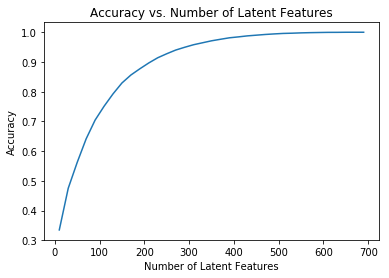

In [42]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [43]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = df_test['user_id']
    test_arts = df_test['article_id']
        
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

### For evaluation

In [44]:
# The users who are both in train and test, can be predicted in test
len(set(df_test.user_id.unique()).intersection(set(df_train.user_id.unique())))

20

In [45]:
# the users who are in test and not in train, have the cold start problem
len(set(df_test.user_id.unique()) - set(df_train.user_id.unique()))

662

In [46]:
# The articles who are both in test and train can be used to make predictions
len(set(df_test.article_id.unique()).intersection(set(df_train.article_id.unique())))

574

In [47]:
# the articles who are in test and not in train, have the cold start problem
len(set(df_test.article_id.unique()) - set(df_train.article_id.unique()))

0

In [48]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c,# letter here, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a,# letter here, 
    'How many movies can we make predictions for in the test set?': b,# letter here,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d# letter here
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [49]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train =  np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below


In [50]:
# Check sizes
print('TRAIN')
print(u_train.shape)
print(s_train.shape)
print(vt_train.shape)


TRAIN
(4487, 4487)
(714,)
(714, 714)


In [51]:
# We obtain u and vt for test from  u and vt from train. 
# If we would use scd on test, it would not provide us with the necessary amount of 
# total latent features
users_to_pred = set(df_test.user_id.unique()).intersection(set(df_train.user_id.unique()))
users_to_pred_bool = user_item_train.index.isin(users_to_pred)
# We take some rows but all the columns
u_test = u_train[users_to_pred_bool, :]
# For the columns we must take another approach
# The articles who are both in test and train can be used to make predictions
articles_to_pred = set(df_test.article_id.unique()).intersection(set(df_train.article_id.unique()))
articles_to_pred_bool = user_item_train.columns.isin(articles_to_pred)
# We take all rows but some columns
vt_test = vt_train[:, articles_to_pred_bool]

In [52]:
print('TEST')
print(u_test.shape)
print(s_train.shape)
print(vt_test.shape)
    

TEST
(20, 4487)
(714,)
(714, 574)


In [53]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data
num_latent_feats = np.arange(10,700+10,20)
sum_errs_train = []
sum_errs_test = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new_train, u_new_train, vt_new_train = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_new_test, vt_new_test =  u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_est_train = np.around(np.dot(np.dot(u_new_train, s_new_train), vt_new_train))
    user_item_est_test = np.around(np.dot(np.dot(u_new_test, s_new_train), vt_new_test))
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_est_train)
    # We have to adjust the size because we are only testing 20 users
    diffs_test = np.subtract(user_item_test.loc[user_item_test.index.isin(users_to_pred)], user_item_est_test)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    sum_errs_train.append(err_train)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_errs_test.append(err_test)
    

In [54]:
data_points_train = user_item_train.size
data_points_test = user_item_test.loc[user_item_test.index.isin(users_to_pred)].size


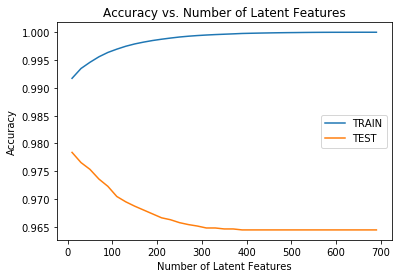

In [55]:
plt.plot(num_latent_feats, \
         1 - np.array(sum_errs_train)/data_points_train, label='TRAIN');
plt.plot(num_latent_feats, \
         1 - np.array(sum_errs_test)/data_points_test, label='TEST');

plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.legend();

`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**The accuracy for the test keeps dropping with more latent features, due to overfitting from training. So I would use less than 100. But the accuracy overall is good. However, the problem is that we had more than 600 users that we could not predict, therefore we seriously lack functionality in the algorithm used. We could use other recommendation types as well like content and knowledge based recommendations to improve the overall system.**

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

0